1. Load and preprocess dataset

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images
X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

2025-07-19 22:52:57.387025: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 22:52:57.389537: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 22:52:57.396608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752958377.408578   18084 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752958377.412053   18084 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752958377.421499   18084 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

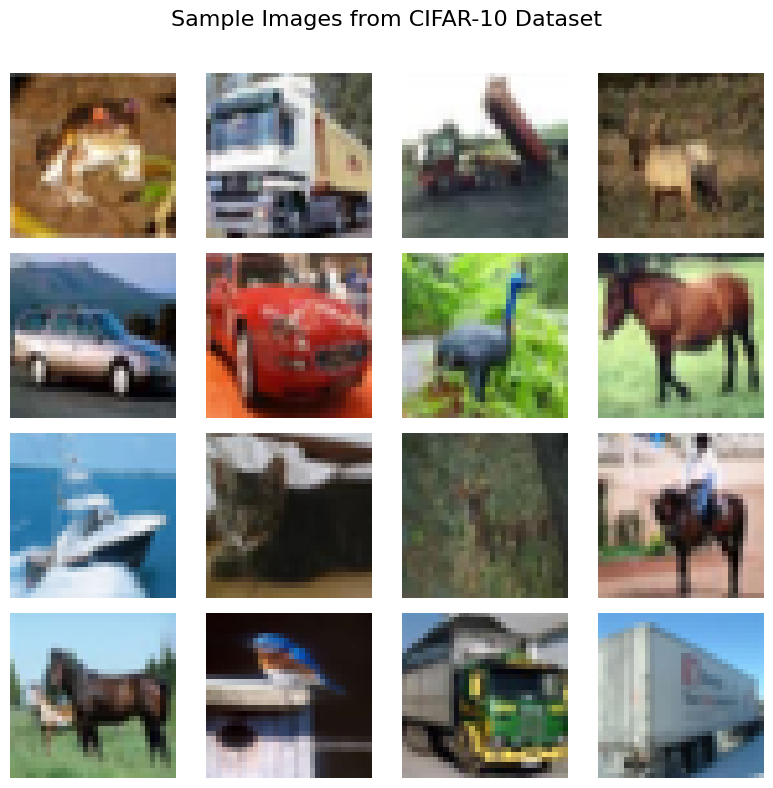

In [3]:
import matplotlib.pyplot as plt

# Display 16 images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(32, 32, 3))
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

2. Define the Dense model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential(
    [
        Dense(512, activation = 'relu',   name = "L1", input_shape=(3072,)),
        Dropout(0.3),
        Dense(256, activation = 'linear', name = "L2"),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ]
)

/home/albert/Documents/projects/Cifar-10-image-classifier/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Compile model

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

4. Training

In [12]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1999 - loss: 2.2120 - val_accuracy: 0.3109 - val_loss: 1.8971
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2791 - loss: 1.9549 - val_accuracy: 0.3457 - val_loss: 1.8169
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2917 - loss: 1.9125 - val_accuracy: 0.3565 - val_loss: 1.8027
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3091 - loss: 1.8792 - val_accuracy: 0.3715 - val_loss: 1.7673
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3121 - loss: 1.8723 - val_accuracy: 0.3600 - val_loss: 1.7888
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3224 - loss: 1.8467 - val_accuracy: 0.3788 - val_loss: 1.7426
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3380 - loss: 1.8219 - val_accuracy: 0.3852 - val_loss: 1.7630
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3322 - loss: 1.8234 - val_accu

5. Evaluation and visualization

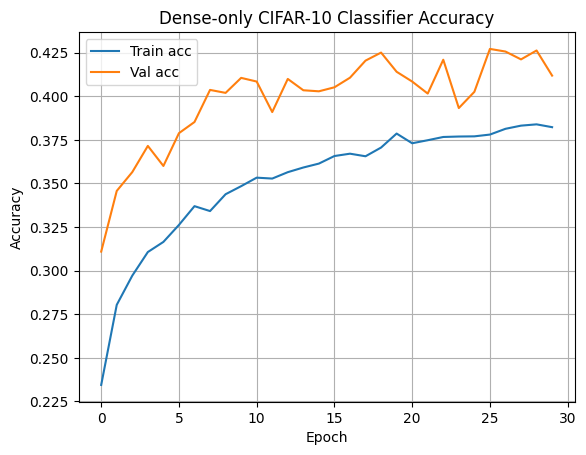

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4135 - loss: 1.6613

Test Accuracy: 41.18%


In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Dense-only CIFAR-10 Classifier Accuracy')
plt.grid(True)
plt.show()

# Evaluación final
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
